In [2]:
import mysql.connector
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# import seaborn as sn

In [ ]:
db = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="",
  database ="gempa"
)

if db.is_connected():
  print("Success connect to database gempa")
else:
  print("turn on your XAMPP!")

Input data from database to dataframe

In [4]:
from sqlalchemy import create_engine, text
engine_cloud = create_engine("mysql+mysqldb://root:@localhost/gempa")
query = "SELECT * FROM infogempa"
db_fixx = pd.DataFrame(engine_cloud.connect().execute(text(query)))
db_fixx

,id_event,status,waktu,lintang,garis_bujur,kedalaman,magnitudo,fokal,area
0,bmg2023lqra,confirmed,2023-06-15 15:40:24,-2.24,140.30,10.0,3.8,undetermined,Near North Coast of West Papua
1,bmg2023lqtr,confirmed,2023-06-15 17:00:38,-2.38,121.02,10.0,2.7,undetermined,"Sulawesi, Indonesia"
2,bmg2023lqvv,confirmed,2023-06-15 18:06:32,-23.04,-177.10,219.0,7.1,undetermined,South of Fiji Islands
3,bmg2023lqvy,confirmed,2023-06-15 18:09:22,-8.47,111.27,129.0,2.4,undetermined,"Java, Indonesia"
4,bmg2023lqwo,confirmed,2023-06-15 18:27:37,-1.06,134.50,10.0,3.9,undetermined,"West Papua Region, Indonesia"
...,...,...,...,...,...,...,...,...,...
585,bmg2023myfj,confirmed,2023-07-04 00:18:23,-24.01,-176.33,101.0,5.6,undetermined,South of Fiji Islands
586,bmg2023mygz,confirmed,2023-07-04 01:12:56,-8.33,117.26,10.0,2.7,undetermined,"Sumbawa Region, Indonesia"
587,bmg2023mykh,confirmed,2023-07-04 02:54:03,1.68,126.50,16.0,3.7,undetermined,Northern Molucca Sea
588,bmg2023mymb,confirmed,2023-07-04 03:47:04,0.59,123.77,25.0,3.3,undetermined,"Minahassa Peninsula, Sulawesi"


# Create Map and Vizualisation Data

In [5]:
# Search data Indonesia location
db_fix = db_fixx.loc[~db_fixx['area'].str.contains('Philippine')]
indo1 = db_fix.loc[(db_fix['garis_bujur'] >= 94.771979) & (db_fix['garis_bujur'] <= 141.008789) & (db_fix['lintang'] <= 5.931513) & (db_fix['lintang'] >= -10.922155) ]
indo1

,id_event,status,waktu,lintang,garis_bujur,kedalaman,magnitudo,fokal,area
0,bmg2023lqra,confirmed,2023-06-15 15:40:24,-2.24,140.30,10.0,3.8,undetermined,Near North Coast of West Papua
1,bmg2023lqtr,confirmed,2023-06-15 17:00:38,-2.38,121.02,10.0,2.7,undetermined,"Sulawesi, Indonesia"
3,bmg2023lqvy,confirmed,2023-06-15 18:09:22,-8.47,111.27,129.0,2.4,undetermined,"Java, Indonesia"
4,bmg2023lqwo,confirmed,2023-06-15 18:27:37,-1.06,134.50,10.0,3.9,undetermined,"West Papua Region, Indonesia"
6,bmg2023lqzb,confirmed,2023-06-15 19:43:48,-6.57,103.96,10.0,3.1,undetermined,"Southwest of Sumatra, Indonesia"
...,...,...,...,...,...,...,...,...,...
584,bmg2023mycx,confirmed,2023-07-03 23:09:15,-9.47,113.94,26.0,3.3,undetermined,"South of Java, Indonesia"
586,bmg2023mygz,confirmed,2023-07-04 01:12:56,-8.33,117.26,10.0,2.7,undetermined,"Sumbawa Region, Indonesia"
587,bmg2023mykh,confirmed,2023-07-04 02:54:03,1.68,126.50,16.0,3.7,undetermined,Northern Molucca Sea
588,bmg2023mymb,confirmed,2023-07-04 03:47:04,0.59,123.77,25.0,3.3,undetermined,"Minahassa Peninsula, Sulawesi"


In [6]:
# initial latitude and longitude
BBox = ((indo1.garis_bujur.min(),
         indo1.garis_bujur.max(),
         indo1.lintang.min(),
         indo1.lintang.max()))
BBox

(95.44, 140.84, -10.76, 5.27)

In [7]:
# Garis Lintang Utara Terluar: 5.931513° LU
# Garis Lintang Selatan Terluar: -10.922155° LS
# Garis Bujur Barat Terluar: 94.771979° BB
# Garis Bujur Timur Terluar: 141.008789° BT

In [8]:
indonesia = plt.imread("map.png")

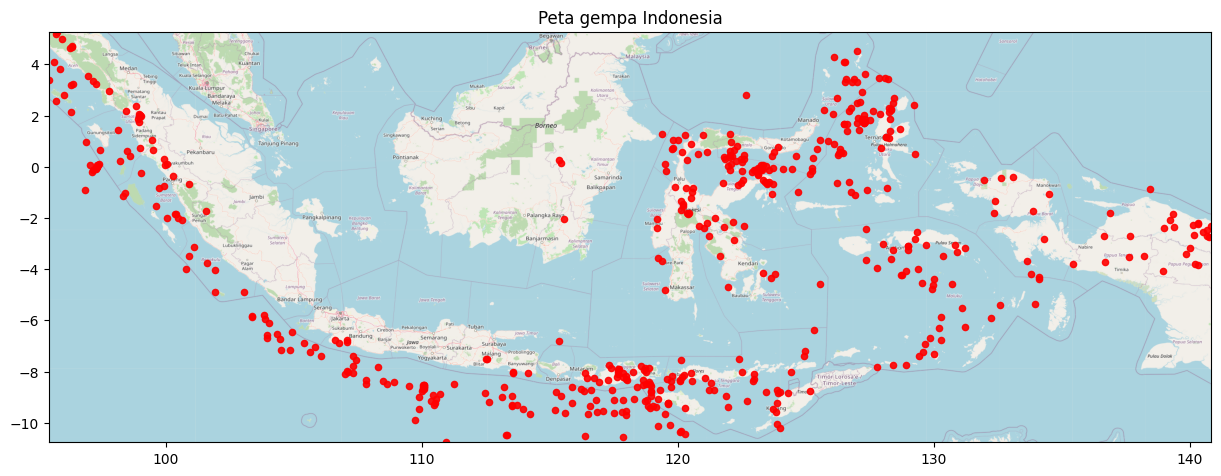

In [9]:
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(indo1.garis_bujur, indo1.lintang, zorder=1, c="red" ,alpha= 0.9, s=20)
ax.set_title('Peta gempa Indonesia')
ax.set_xlim(95.44, 140.84)
ax.set_ylim(-10.76, 5.27)
ax.imshow(indonesia, zorder=0, extent = BBox, aspect= 'equal')

Earthquake Magnitude Frequency

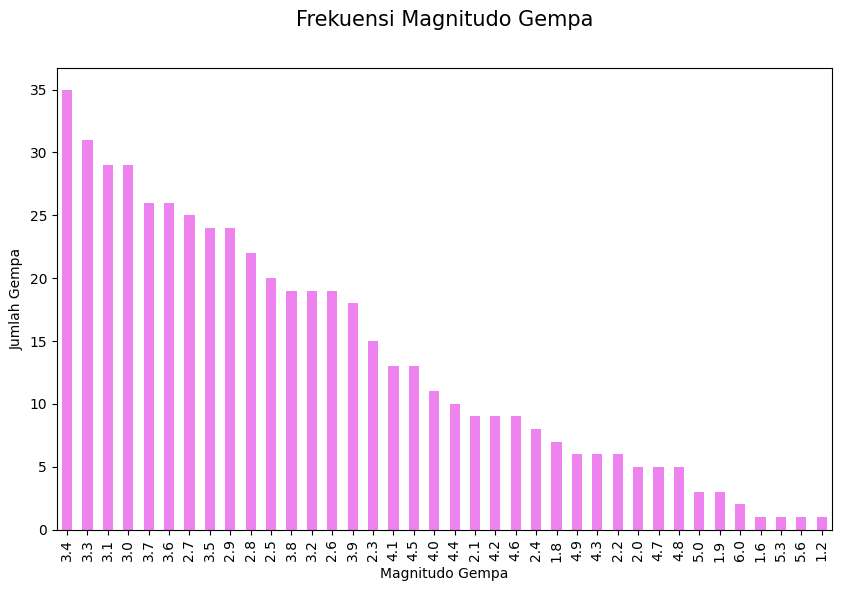

In [10]:
indo1.groupby('magnitudo')['magnitudo'].count().sort_values(ascending=False).plot(kind = 'bar', color = "violet", figsize=(10,6))
plt.title("Frekuensi Magnitudo Gempa", loc ="center", pad=30, fontsize = 15, color = "black")
plt.xlabel('Magnitudo Gempa') 
plt.ylabel('Jumlah Gempa')
# plt.ylim(ymin=0)
# labels, locations = plt.yticks()
# plt.yticks(labels,(labels/1000).astype(int))
plt.show()

Number of earthquakes in Indonesia by region

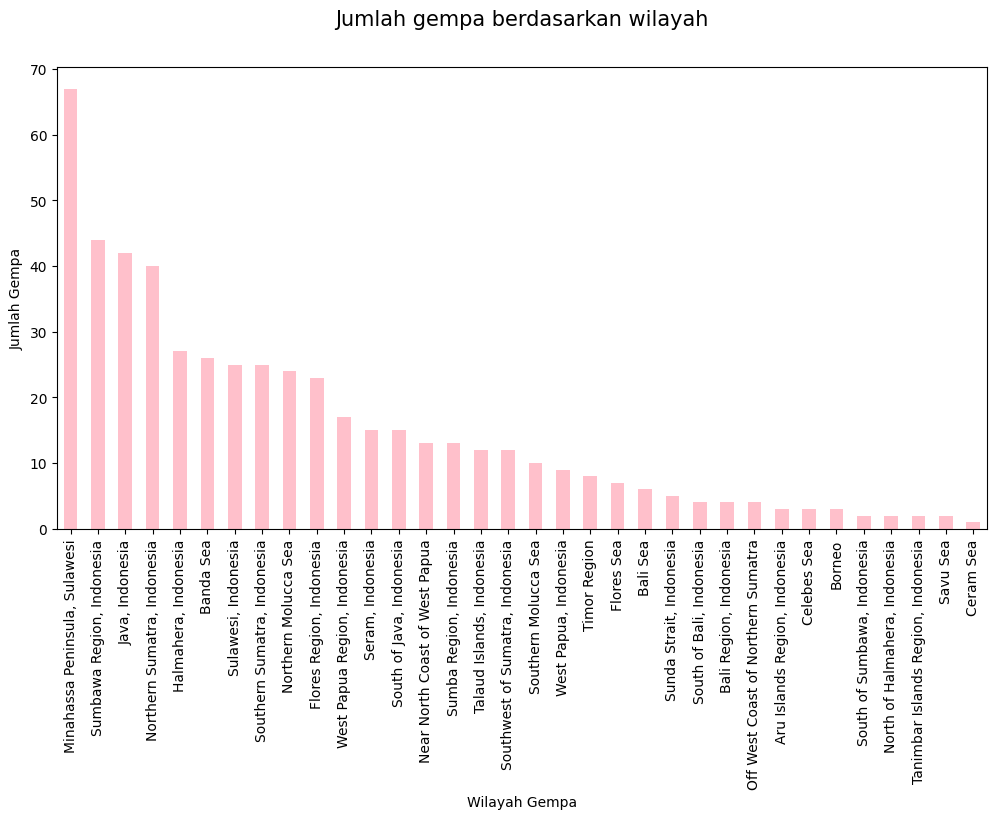

In [11]:
indo1.groupby('area')['area'].count().sort_values(ascending=False).plot(kind = 'bar', color = "pink", figsize=(12,6))
plt.title("Jumlah gempa berdasarkan wilayah", loc ="center", pad=30, fontsize = 15, color = "black")
plt.xlabel('Wilayah Gempa') 
plt.ylabel('Jumlah Gempa')
# plt.ylim(ymin=0)
# labels, locations = plt.yticks()
# plt.yticks(labels,(labels/1000).astype(int))
plt.show()

Scatter of Earthquakes

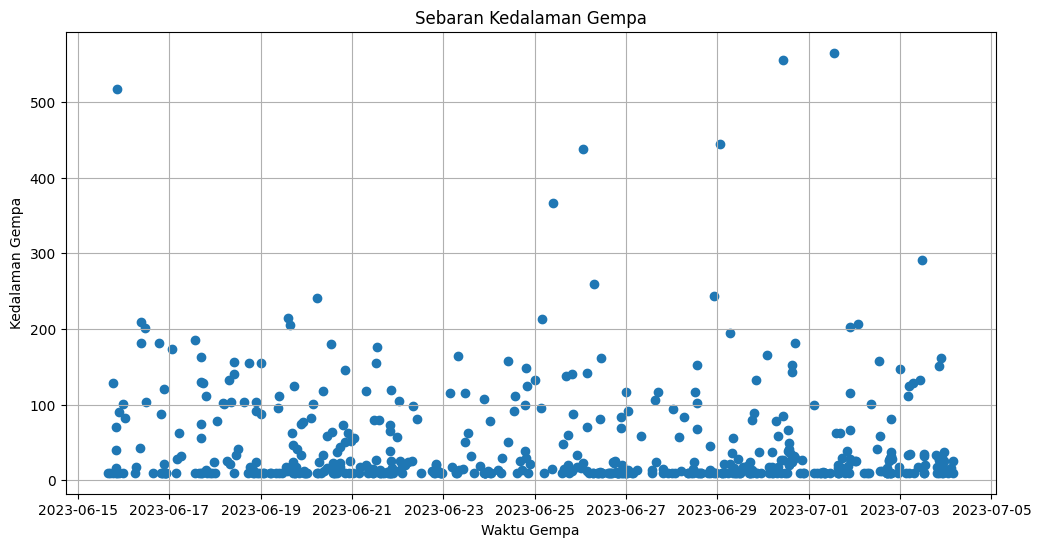

In [12]:
x = indo1['waktu']
y = indo1['kedalaman']
# Membuat scatter plot
plt.figure(figsize=(12,6))
plt.scatter(x, y)

# Mengatur label dan judul
plt.xlabel('Waktu Gempa')
plt.ylabel('Kedalaman Gempa')
plt.title('Sebaran Kedalaman Gempa')

# Menampilkan grid
plt.grid(True)


Earthquake categories are based on magnitude
https://ilmudatapy.com/cara-membuat-bar-plot-dengan-matplotlib-python/

In [13]:
# Mencari Type Gempa Ultra Mikro <2
ultra_mikro = indo1.loc[indo1['magnitudo'] < 2]
ultra_mikros = len(ultra_mikro)

# Mencari Type Gempa Mikro 2-3
gempa_mikro = indo1.loc[(indo1['magnitudo'] >= 2) & (indo1['magnitudo'] < 3)]
gempa_mikros = len(gempa_mikro)

# Mencari Type Gempa BUmi Kecil 3-4
kecil = indo1.loc[(indo1['magnitudo'] >= 3) & (indo1['magnitudo'] < 4)]
kecils = len(kecil)

# Mencari Type Gempa Sedang 4-5
sedang = indo1.loc[(indo1['magnitudo'] >= 4) & (indo1['magnitudo'] < 5)]
sedangs = len(sedang)

# Mencari Type Gempa Merusak 5-6
merusak = indo1.loc[(indo1['magnitudo'] >= 5) & (indo1['magnitudo'] <= 6)]
merusaks = len(merusak)

# Mencari Type Gempa Besar 7-8
besar = indo1.loc[(indo1['magnitudo'] > 7) & (indo1['magnitudo'] < 8)]
besars = len(besar)

# Mencari Type Gempa SAngat Besar >8
sangat_besar = indo1.loc[(indo1['magnitudo'] > 8)]
sangat_besars = len(sangat_besar)

ultra_mikros+ gempa_mikros+ kecils+ sedangs+ merusaks+ besars+ sangat_besars

515

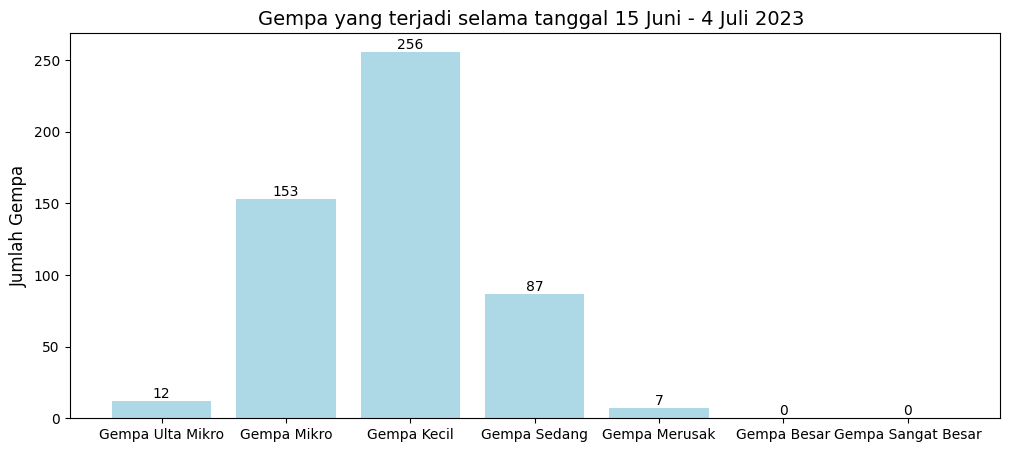

In [14]:
gempa = ['Gempa Ulta Mikro', 'Gempa Mikro', 'Gempa Kecil', 'Gempa Sedang', 'Gempa Merusak' ,'Gempa Besar', 'Gempa Sangat Besar']
jumlah_gmp = [ultra_mikros, gempa_mikros, kecils, sedangs, merusaks, besars, sangat_besars]

plt.figure(figsize=(12,5))
plt.bar(gempa, jumlah_gmp, color='lightblue')
# Menampilkan jumlah di atas setiap bar
for i in range(len(gempa)):
    plt.text(i, jumlah_gmp[i], str(jumlah_gmp[i]), ha='center', va='bottom')
plt.title('Gempa yang terjadi selama tanggal 15 Juni - 4 Juli 2023 ', size=14)
plt.ylabel('Jumlah Gempa', size=12)
plt.xticks(size=10)
plt.yticks(size=10)
# plt.grid()
plt.show()

Number of earthquakes by date

In [50]:
limaenambelas = indo1.loc[indo1['waktu'] < "2023-06-16 00:00:00"]
enam = len(limaenambelas)
tujulapanbelas = indo1.loc[(indo1['waktu'] >= "2023-06-16 00:00:00") & (indo1['waktu'] < "2023-06-18 00:00:00")]
tuju = len(tujulapanbelas)
duapuluhbelas = indo1.loc[(indo1['waktu'] >= "2023-06-18 00:00:00") & (indo1['waktu'] < "2023-06-20 00:00:00")]
dua = len(duapuluhbelas)
tigapuluhbelas = indo1.loc[(indo1['waktu'] >= "2023-06-20 00:00:00") & (indo1['waktu'] <  "2023-06-22 00:00:00")]
tiga = len(tigapuluhbelas)
limapuluhbelas = indo1.loc[(indo1['waktu'] >= "2023-06-22 00:00:00") & (indo1['waktu'] <  "2023-06-24 00:00:00")]
lima = len(limapuluhbelas)
tujuhpuluhbelas = indo1.loc[(indo1['waktu'] >= "2023-06-24 00:00:00") & (indo1['waktu'] <  "2023-06-26 00:00:00")]
tujuh = len(tujuhpuluhbelas)
sembilanpuluhbelas = indo1.loc[(indo1['waktu'] >= "2023-06-26 00:00:00") & (indo1['waktu'] <  "2023-06-28 00:00:00")]
sembilan = len(sembilanpuluhbelas)
satupuluhbelas = indo1.loc[(indo1['waktu'] >= "2023-06-28 00:00:00") & (indo1['waktu'] <  "2023-06-30 00:00:00")]
satu = len(satupuluhbelas)
tigahpuluhbelas = indo1.loc[(indo1['waktu'] >= "2023-06-30 00:00:00") & (indo1['waktu'] <  "2023-07-02 00:00:00")]
tigah = len(tigahpuluhbelas)
limahpuluhbelas = indo1.loc[(indo1['waktu'] >= "2023-07-02 00:00:00") & (indo1['waktu'] <  "2023-07-04 00:00:00")]
limah= len(limahpuluhbelas)
limahpuluhbelas = indo1.loc[indo1['waktu'] >= "2023-07-04 00:00:00"]
empath= len(limahpuluhbelas)

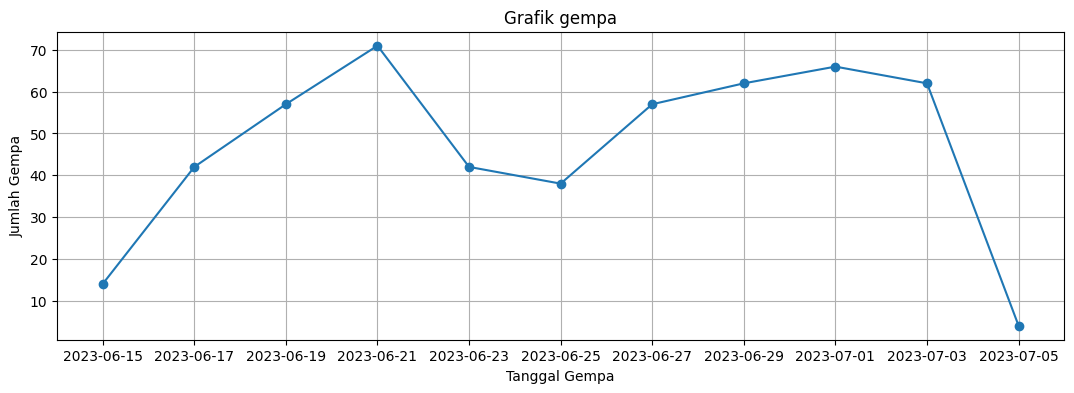

In [52]:

plt.figure(figsize=(13,4))
y = [enam, tuju, dua, tiga, lima,tujuh,sembilan,satu,tigah,limah,empath]
x = ["2023-06-15", "2023-06-17", "2023-06-19", "2023-06-21", "2023-06-23", "2023-06-25","2023-06-27" ,"2023-06-29", "2023-07-01", "2023-07-03", "2023-07-05"]
plt.plot(x,y, marker='o', linestyle='-')

plt.xlabel('Tanggal Gempa')
plt.ylabel('Jumlah Gempa')

plt.title('Grafik gempa')
plt.grid(True)

plt.show()

Earthquakes by Region

In [17]:
# Comparing data between DataFrame from own database and DataFrame from another source
luar_indo= db_fixx.merge(indo1, how='outer', indicator=True).loc[lambda x: x['_merge'] != 'both']

# Show comparing result
luar_indos = len(luar_indo)
indos = len(indo1)

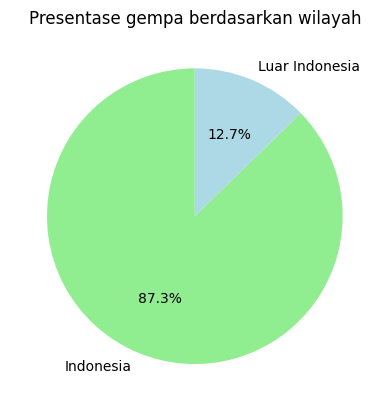

In [18]:
labels = ['Indonesia', 'Luar Indonesia']
sizes = [indos, luar_indos]
colors = ['lightgreen','lightblue']
# explode = (0, 0.1, 0, 0)  # for hightligh a specific piece of pie

# Create pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Presentase gempa berdasarkan wilayah')
plt.show()

Time Histogram

<function matplotlib.pyplot.show(close=None, block=None)>

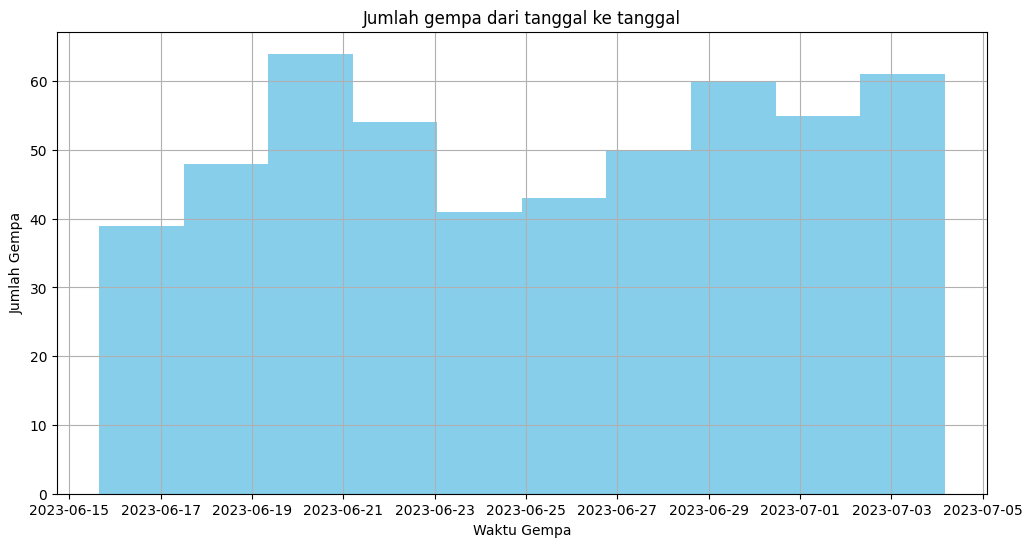

In [19]:
plt.figure(figsize=(12,6))
plt.hist(x="waktu",data=indo1, color='skyblue')
plt.xlabel("Waktu Gempa")
plt.ylabel("Jumlah Gempa")
plt.title("Jumlah gempa dari tanggal ke tanggal")
plt.grid()
plt.show

Correlation of earthquake depth and magnitude

In [ ]:
# corr = db_fix[["kedalaman","magnitudo"]].corr()
# sn.heatmap(corr, annot=True, cmap = "Greens")
# plt.title("Korelasi kedalaman dan magnitudo gempa Indonesia")
# plt.show()

In [15]:
# # Jika nilai korelasi mendekati 1 maka hubungan antar atribut semakin tinggi
# corr = db_fix[["kedalaman","magnitudo"]].corr()
# corr

,kedalaman,magnitudo
kedalaman,1.00000,0.09856
magnitudo,0.09856,1.00000
